In [62]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

In [12]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [23]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)

d:\cursor_code\python\Lstm\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
x_input = np.array([70, 80, 100])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[105.39105]]


In [43]:
df = pd.read_csv("../../data/LSTM-Multivariate_pollution.csv")
df = df.dropna()
df.drop(['dew', 'temp', 'press', 'wnd_dir', 'wnd_spd',"snow","rain"], axis=1, inplace=True)

df['date'] = pd.to_datetime(df['date'])
df_chg= df.set_index(['date'], drop=True)



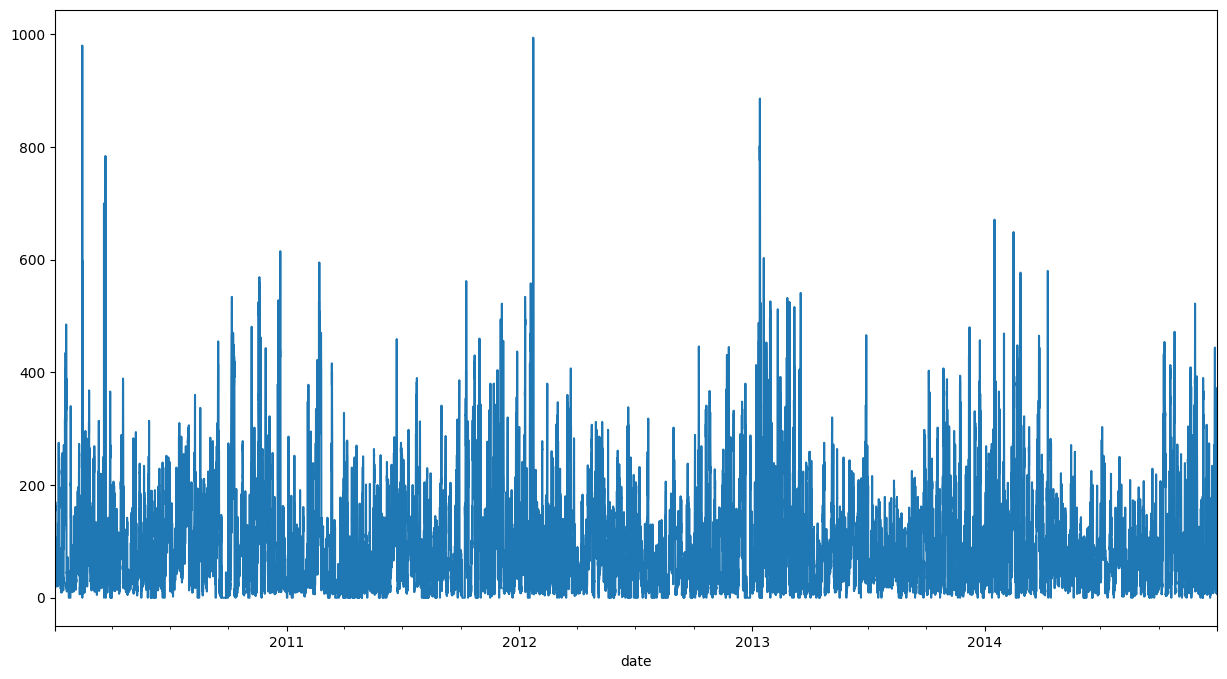

In [44]:
plt.figure(figsize=(15,8))
df_chg['pollution'].plot();

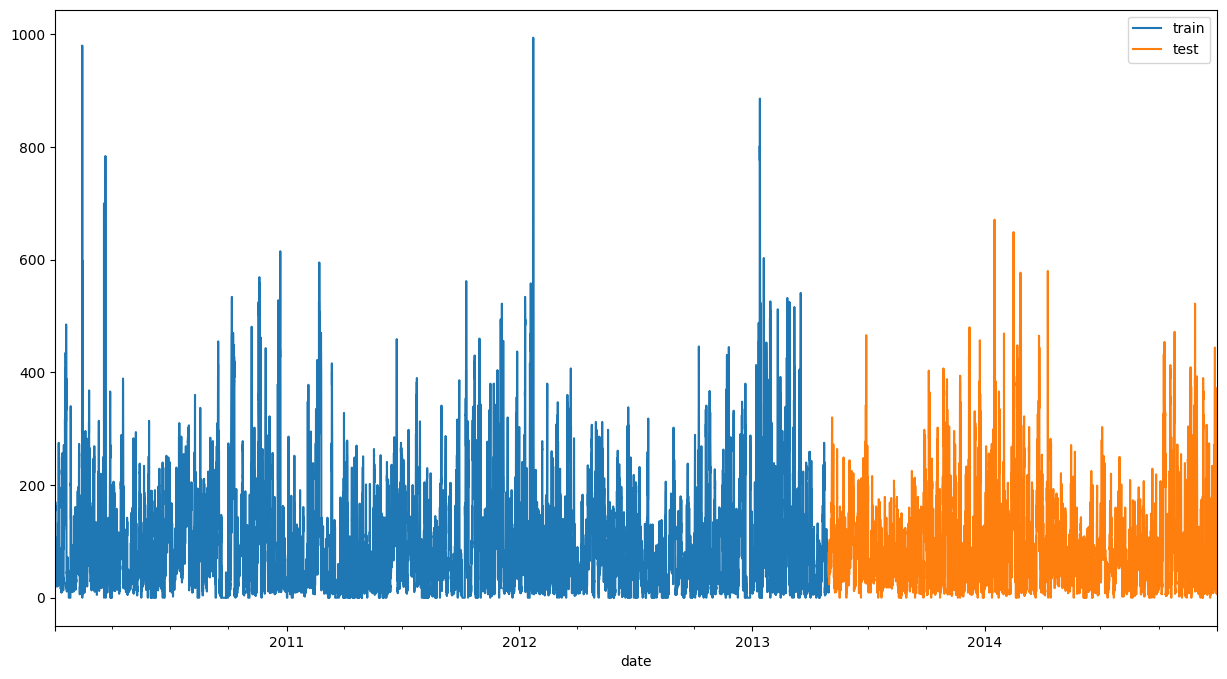

In [52]:
split_date = pd.Timestamp('2013-05-01')
df1 = df_chg['pollution'] 
train = df1.loc[:split_date]
test = df1.loc[split_date:]

plt.figure(figsize=(15,8))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [53]:
print("We have", len(train), "train values")
print("We have", len(test), "test values")

We have 29161 train values
We have 14640 test values


In [90]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:1996:1]
test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[1995:2495:1]

print(f"test_processed {test_processed.shape} \n")
print(f"train_processed {train_processed.shape} \n")


test_processed (500, 1) 

train_processed (1996, 1) 



In [58]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)

In [118]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

print(X_test.shape)


(499, 1)


In [61]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100


d:\cursor_code\python\Lstm\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2041
Epoch 2/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0113
Epoch 3/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0080
Epoch 4/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0057
Epoch 5/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0045
Epoch 6/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0039
Epoch 7/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0037
Epoch 8/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0036
Epoch 9/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0036
Epoch 10/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0035
Epoch 11/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0035
Epoch 12/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0035
Epoch 13/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0035
Epoch 14/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0035
Epoch 15/100
1995/1995 ━━━━

In [64]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
The R2 score on the Train set is:	0.804
The R2 score on the Test set is:	0.842


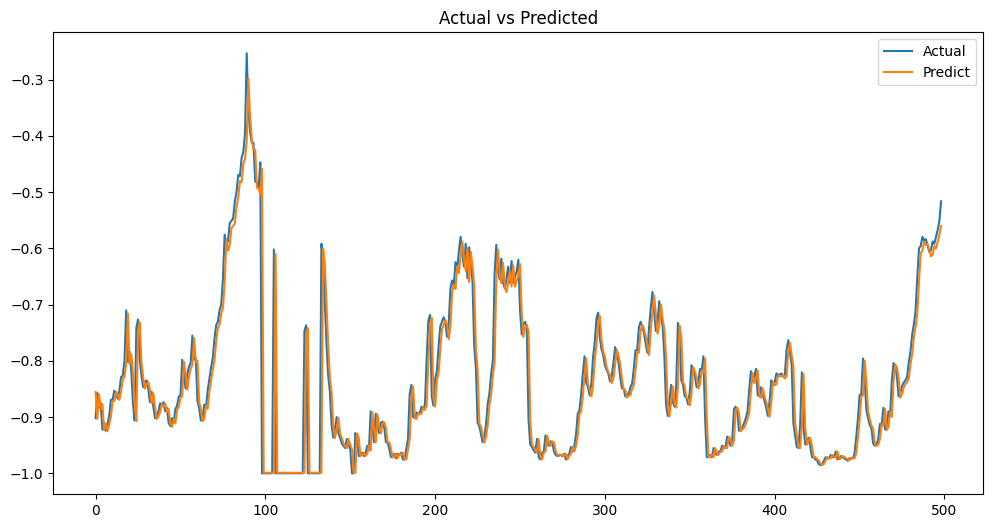

In [65]:

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_test_nn, label='Predict')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



In [85]:
foredcasting = np.array([12,15,17]).reshape(-1,1)
foredcasting_transform = scaler.fit_transform(foredcasting)
y_new = nn_model.predict(foredcasting_transform)

sclaed = scaler.inverse_transform(y_new)
sclaed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[12.002232],
       [13.543598],
       [12.430692]], dtype=float32)

In [105]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], )
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], )


for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
test_sc_df.dropna()
train_sc_df.dropna()

,Y,X_1
1,-0.697959,-0.736735
2,-0.675510,-0.697959
3,-0.630612,-0.675510
4,-0.718367,-0.630612
5,-0.777551,-0.718367
...,...,...
1991,-0.879592,-0.930612
1992,-0.871429,-0.879592
1993,-0.863265,-0.871429
1994,-0.873469,-0.863265


In [109]:
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)
X_train = X_train['X_1']
y_train = y_train['Y']
X_test = X_test['X_1']
y_test = y_test['Y']

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

array([-0.85306122, -0.90204082, -0.85714286, -0.88367347, -0.8755102 ,
       -0.92244898, -0.91020408, -0.9244898 , -0.9122449 , -0.89795918,
       -0.86938776, -0.86938776, -0.85306122, -0.85714286, -0.86734694,
       -0.85306122, -0.82857143, -0.82653061, -0.8       , -0.71020408,
       -0.80204082, -0.78367347, -0.81836735, -0.8755102 , -0.90612245,
       -0.74081633, -0.72653061, -0.79795918, -0.82653061, -0.84693878,
       -0.83877551, -0.83469388, -0.84897959, -0.87346939, -0.85510204,
       -0.88163265, -0.90204082, -0.89795918, -0.88979592, -0.8755102 ,
       -0.87959184, -0.87346939, -0.88979592, -0.88367347, -0.91020408,
       -0.91632653, -0.90204082, -0.91020408, -0.88571429, -0.87959184,
       -0.86326531, -0.86122449, -0.79795918, -0.82040816, -0.84897959,
       -0.8244898 , -0.81020408, -0.80408163, -0.75510204, -0.79795918,
       -0.79591837, -0.87142857, -0.88367347, -0.90612245, -0.90204082,
       -0.87755102, -0.88367347, -0.85306122, -0.83265306, -0.81

In [110]:
X_train_lmse = X_train.reshape(X_train.shape[0], 1, 1)
X_test_lmse = X_test.reshape(X_test.shape[0], 1, 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (1995, 1, 1)
Test shape:  (499, 1, 1)


In [111]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100


d:\cursor_code\python\Lstm\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1995/1995 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2505
Epoch 2/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0088
Epoch 3/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0057
Epoch 4/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0043
Epoch 5/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0039
Epoch 6/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0037
Epoch 7/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0037
Epoch 8/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0037
Epoch 9/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0036
Epoch 10/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0036
Epoch 11/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0036
Epoch 12/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0036
Epoch 13/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0036
Epoch 13: early stopping


In [112]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The R2 score on the Train set is:	0.802
The R2 score on the Test set is:	0.840


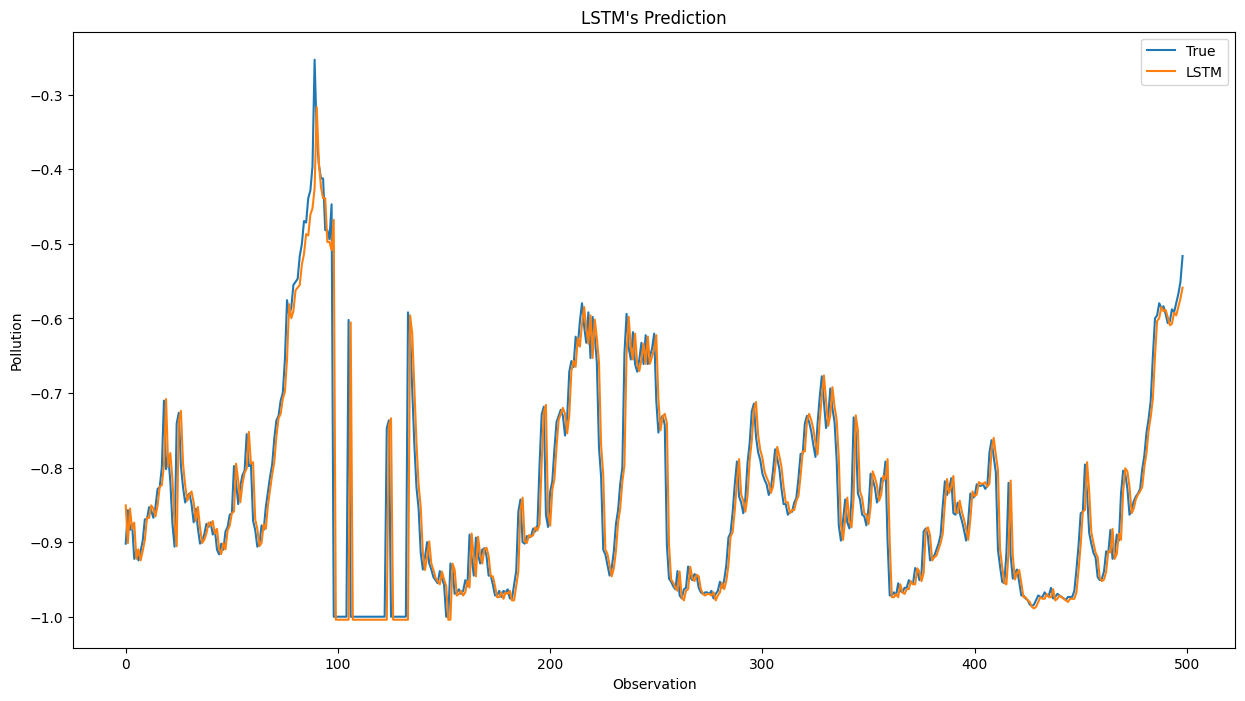

In [123]:
# nn_y_pred_test = nn_model.predict(X_test)
# lstm_y_pred_test = lstm_model.predict(X_test_lmse)
# print(X_test)

plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(lstm_y_pred_test, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Pollution')
plt.legend()
plt.show();